# Data Preparation


In [1]:
import pandas as pd 
import numpy as np

import warnings

warnings.simplefilter("ignore", UserWarning)

In [2]:
path = '~/Desktop/MSCA 31015 DS for consulting/Assignments/'
churn_data = pd.read_excel(path+'Data.xlsx')

In [3]:
churn_data.head(10)

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,19970101,2178.85,250.00,6.0,4,1,0,2,0
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0
2,19970101,1107.67,125.00,5.0,1,0,0,2,0
3,19970102,950.44,237.61,9.0,5,0,0,1,0
4,19970103,1436.00,250.00,9.0,3,0,0,2,0
5,19970104,1248.00,150.00,12.0,1,0,0,1,0
6,19970105,249.00,249.00,8.0,1,0,0,2,0
7,19970105,909.79,350.00,13.0,5,1,0,2,0
8,19970106,1677.00,125.00,10.0,1,0,0,2,1
9,19970106,1844.00,1844.00,9.0,1,7,0,1,0


In [4]:
num_cols = ['price', 'downpmt', 'age', 'monthdue']
churn_data[num_cols].describe()

,price,downpmt,age,monthdue
count,24843.000000,24843.000000,24843.000000,24843.000000
mean,1003.658899,199.824535,29.203317,8.287290
std,439.224768,335.437237,13.277721,7.108381
min,0.000000,0.000000,0.000000,0.000000
25%,699.000000,49.000000,22.000000,5.500000
50%,999.000000,100.000000,28.000000,6.000000
75%,1249.000000,175.000000,36.000000,9.000000
max,9371.250000,9371.250000,99.000000,120.000000


In [5]:
# frequency 
churn_data['use'].value_counts()

0    9919
1    5776
6    2462
3    2385
4    1483
5    1125
7     792
2     618
8     283
Name: use, dtype: int64

In [6]:
## check any missing value or not
churn_data.isnull().sum(axis=0)  # axis=0

enrolldt    0
price       0
downpmt     0
monthdue    0
pmttype     0
use         0
age         0
gender      0
default     0
dtype: int64

In [7]:
# clean age column
churn_data['age'].describe()

count    24843.000000
mean        29.203317
std         13.277721
min          0.000000
25%         22.000000
50%         28.000000
75%         36.000000
max         99.000000
Name: age, dtype: float64

# Data Visualization

In [8]:
import matplotlib.pyplot as plt

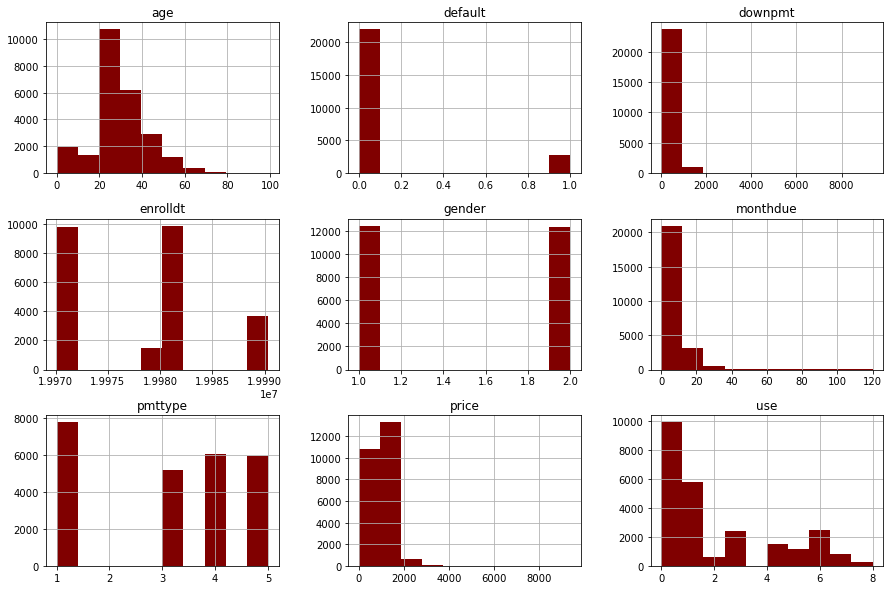

In [9]:
fig = plt.figure(figsize = (15, 10))
ax  = fig.gca()
churn_data.hist(ax = ax, color = 'maroon')
pass

In [10]:
#Choose Downpmt

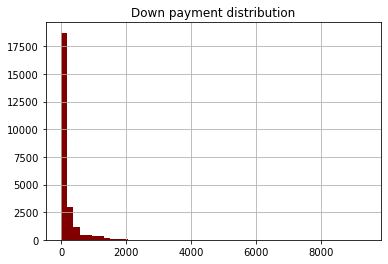

In [11]:
churn_data.downpmt.hist(color = 'maroon', bins = 50)
plt.title('Down payment distribution')
pass 

In [12]:
#Correlation

In [13]:
num_cols = ['price', 'downpmt',  'age']
churn_num = churn_data[num_cols]
cor = churn_num.corr() # by deafault - pearson
cor

,price,downpmt,age
price,1.000000,0.277764,-0.097624
downpmt,0.277764,1.000000,0.000483
age,-0.097624,0.000483,1.000000


# Data Preprocessing

In [14]:
#Eliminate customers above 17 and 79
churn_data = churn_data[churn_data['age'].between(17, 79)]

# Dimensions 
churn_data.shape
# As a result we removed about 2000 rows

(22582, 9)

In [15]:
# Create dummy variables
churn_data = pd.get_dummies(churn_data, columns = ['pmttype', 'use'], drop_first = True, prefix = ['pmttype', 'use'])

# Print
churn_data.head()

,enrolldt,price,downpmt,monthdue,age,gender,default,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
2241,19970106,2175.00,400.00,5.50,17,2,0,1,0,0,0,0,0,0,0,0,0,0
2242,19970119,551.05,459.03,28.89,17,2,0,0,0,0,0,0,0,0,0,1,0,0
2243,19970127,1838.19,100.00,5.86,17,2,1,0,0,0,0,0,0,0,0,0,0,0
2244,19970130,2175.00,2175.00,6.00,17,1,0,0,0,0,0,0,0,0,0,0,0,0
2245,19970208,1464.44,1464.44,11.00,17,1,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create % down payment as a new column

# This column might be helpful for our future modelling.
# Calculate percent
churn_data['downpmt_percent'] = churn_data.downpmt/churn_data.price

# Round percent column
churn_data['downpmt_percent'] = churn_data.downpmt_percent.round(2)

# Print
churn_data.tail()

,enrolldt,price,downpmt,monthdue,age,gender,default,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8,downpmt_percent
24818,19980824,1023.00,175.00,7.0,79,1,0,0,0,1,1,0,0,0,0,0,0,0,0.17
24819,19980827,774.00,50.00,7.0,79,1,0,0,0,1,0,0,0,0,0,0,0,0,0.06
24820,19980903,1198.00,100.00,23.0,79,2,0,0,1,0,1,0,0,0,0,0,0,0,0.08
24821,19981009,651.63,651.63,34.0,79,1,0,1,0,0,0,0,0,0,0,0,0,0,1.00
24822,19981106,1048.00,1048.00,5.0,79,1,0,1,0,0,0,0,1,0,0,0,0,0,1.00


In [17]:
# Drop the enrolldt varibale
churn_data= churn_data.drop(['enrolldt'], axis = 1)

In [18]:
churn_data.isnull().sum(axis=0)

price               0
downpmt             0
monthdue            0
age                 0
gender              0
default             0
pmttype_3           0
pmttype_4           0
pmttype_5           0
use_1               0
use_2               0
use_3               0
use_4               0
use_5               0
use_6               0
use_7               0
use_8               0
downpmt_percent    24
dtype: int64

In [19]:
# imputation method 1
avg = churn_data['downpmt_percent'].mean()
churn_data = churn_data.fillna(avg, axis=1)


# Model Building
## Logidtic Regression

In [20]:
y = churn_data['default']
X = churn_data.drop('default', axis = 1)

In [21]:
X.head(5)

,price,downpmt,monthdue,age,gender,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8,downpmt_percent
2241,2175.00,400.00,5.50,17,2,1,0,0,0,0,0,0,0,0,0,0,0.18
2242,551.05,459.03,28.89,17,2,0,0,0,0,0,0,0,0,1,0,0,0.83
2243,1838.19,100.00,5.86,17,2,0,0,0,0,0,0,0,0,0,0,0,0.05
2244,2175.00,2175.00,6.00,17,1,0,0,0,0,0,0,0,0,0,0,0,1.00
2245,1464.44,1464.44,11.00,17,1,0,0,0,0,0,0,0,0,0,0,0,1.00


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify= y) 

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [27]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
logerg

LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test) 

In [71]:
from collections import Counter
Counter(y_pred)

Counter({0: 4213, 1: 304})

## Confusion matrix

In [72]:
y_test #actual Y

16794    0
19729    0
5097     0
14595    0
22887    0
        ..
3536     0
8368     0
3351     0
11332    0
20836    0
Name: default, Length: 4517, dtype: int64

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("The Confusion Matrix is \n \n", confusion_matrix(y_test, y_pred))

The Confusion Matrix is 
 
 [[3872  103]
 [ 341  201]]


In [74]:
print("The Classification table is \n \n", classification_report(y_test, y_pred))

The Classification table is 
 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      3975
           1       0.66      0.37      0.48       542

    accuracy                           0.90      4517
   macro avg       0.79      0.67      0.71      4517
weighted avg       0.89      0.90      0.89      4517



## ROC curve

In [75]:
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _  = metrics.roc_curve(y_test,  y_pred_proba)

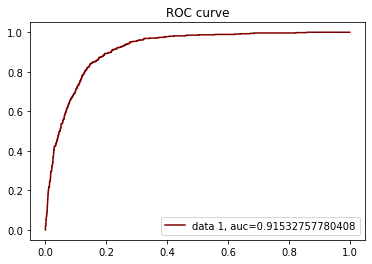

In [76]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc), color = 'maroon')
plt.legend(loc = 4)
plt.title('ROC curve')
plt.show()

## Gains Chart

In [81]:
#!pip install scikit-plot

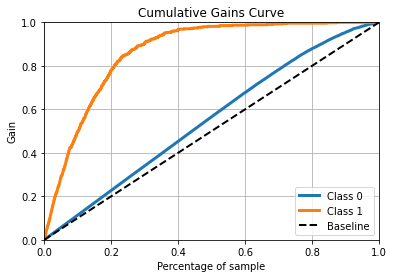

In [82]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,logreg.predict_proba(X_test))
plt.show()

## Feature Selection

In [83]:
# Getting the best coefficients
feature_imp = logreg.coef_
coef_table = pd.DataFrame({"feature_names":X_train.columns, "Beta":feature_imp[0], "AbsBeta":abs(feature_imp[0])})
# Get the sorted values
coef_table = coef_table.sort_values(by = 'AbsBeta', ascending = False)
print("The most important features in the model are: \n")
coef_table

The most important features in the model are: 



,feature_names,Beta,AbsBeta
6,pmttype_4,-4.441031,4.441031
7,pmttype_5,-3.367356,3.367356
13,use_6,-1.913459,1.913459
10,use_3,-1.420315,1.420315
11,use_4,-1.145564,1.145564
5,pmttype_3,-0.974510,0.974510
12,use_5,-0.968611,0.968611
8,use_1,-0.739540,0.739540
14,use_7,-0.603165,0.603165
9,use_2,-0.389622,0.389622
